In [2]:
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')

In [110]:
results["landscape"]["beta"]

2.0

In [113]:
delta_gammas[nx]

3.0

In [114]:
delta_betas[ny]

2.0

3.0 0.6000000000000001


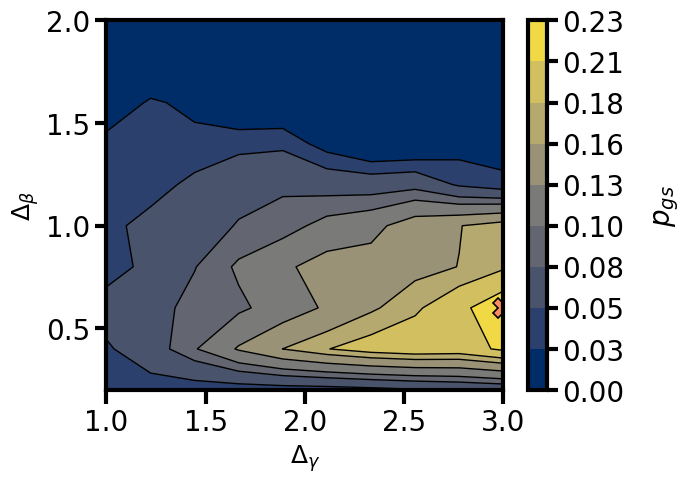

In [115]:
problem_name = ["17_farm","17_mammalia-kangaroo-interactions",][1]
results = np.load(f"./Data/{problem_name}_results.npy", allow_pickle=True).item()
colors = plt.get_cmap("Set2")

delta_gammas = results["landscape"]["delta_gammas"]
delta_betas = results["landscape"]["delta_betas"]
probability = results["landscape"]["probability"]

X, Y = np.meshgrid(delta_gammas, delta_betas)
prop = r"$p_{gs}$"
Z = probability

fig, ax = plt.subplots()
nx, ny = np.argmax(probability)%len(delta_betas), np.argmax(probability)//len(delta_betas)

levels = np.round(np.linspace(np.min(Z),np.max(Z),10),2)
norm = cm.colors.Normalize(vmax=np.max(Z), vmin=np.min(Z))
cmap = cm.coolwarm
cset1 = ax.contourf(X, Y, Z, levels, norm=norm,
                        cmap="cividis")
cset2 = ax.contour(X, Y, Z, cset1.levels, colors='k')
cset2.set_linestyle('solid')
cset3 = ax.contour(X, Y, Z, (0,), colors='g', linewidths=1)
colorbar = fig.colorbar(cset1, ax=ax)
colorbar.set_label(prop, rotation=90, labelpad=20)
ax.set_xlabel(r"$\Delta_{\gamma}$", fontsize=18);
ax.set_ylabel(r"$\Delta_{\beta}$", fontsize=18);
# ax.set_xscale("log")
# ax.plot(betas, gammas, linestyle="--", color="black")
ax.plot(delta_gammas[nx], delta_betas[ny], marker="X", markersize=14, markeredgecolor="black", color=colors(1))
print(delta_gammas[nx], delta_betas[ny])
fig.savefig(f"./Figures/Landscapes/{problem_name}.pdf", bbox_inches="tight", transparent=True)

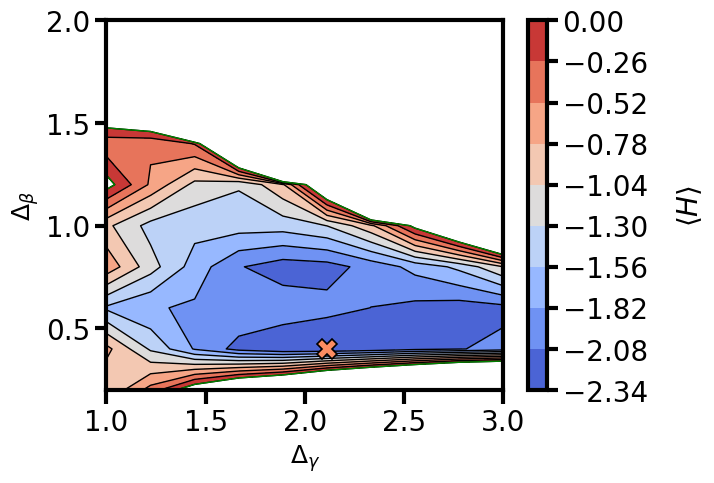

In [78]:
problem_name = ["17_farm","17_mammalia-kangaroo-interactions",][1]
results = np.load(f"./Data/{problem_name}_results.npy", allow_pickle=True).item()
colors = plt.get_cmap("Set2")

delta_gammas = results["landscape"]["delta_gammas"]
delta_betas = results["landscape"]["delta_betas"]
probability = results["landscape"]["energy"]

X, Y = np.meshgrid(delta_gammas, delta_betas,)
prop = r"$\langle H \rangle$"
Z = probability

fig, ax = plt.subplots()
nx, ny = np.argmin(probability)%len(delta_betas), np.argmin(probability)//len(delta_betas)

levels = np.round(np.linspace(np.min(Z),0,10),2)
norm = cm.colors.Normalize(vmax=0, vmin=np.min(Z))
cmap = cm.coolwarm
cset1 = ax.contourf(X, Y, Z, levels, norm=norm,
                        cmap="coolwarm")
cset2 = ax.contour(X, Y, Z, cset1.levels, colors='k')
cset2.set_linestyle('solid')
cset3 = ax.contour(X, Y, Z, (0,), colors='g', linewidths=1)
colorbar = fig.colorbar(cset1, ax=ax)
colorbar.set_label(prop, rotation=90, labelpad=20)
ax.set_xlabel(r"$\Delta_{\gamma}$", fontsize=18);
ax.set_ylabel(r"$\Delta_{\beta}$", fontsize=18);
# ax.set_xscale("log")
# ax.plot(betas, gammas, linestyle="--", color="black")
ax.plot(delta_gammas[nx], delta_betas[ny], marker="X", markersize=14, markeredgecolor="black", color=colors(1))
fig.savefig(f"./Figures/Landscapes/{problem_name}_energy.pdf", bbox_inches="tight", transparent=True)

min TTS 130.0 | p = 26


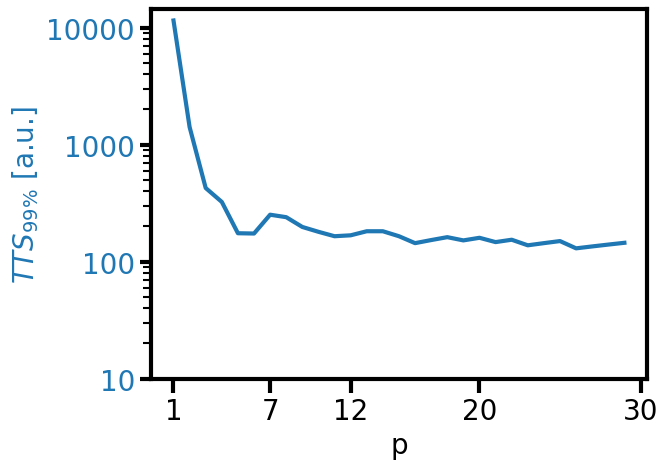

In [79]:
problem_name = ["17_farm","17_mammalia-kangaroo-interactions",][1]
results = np.load(f"./Data/{problem_name}_results.npy", allow_pickle=True).item()
list_p = results["landscape"]["optimal"]["list_p"]
TTS = results["landscape"]["optimal"]["TTS"]
STS = results["landscape"]["optimal"]["STS"]
fig, ax = plt.subplots()
ax.plot(list_p, TTS, linewidth=3)

ax.set_xlabel("p")
ax.set_ylabel(r"$TTS_{99\%}$ [a.u.]", color="tab:blue")
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_yscale("log")
ax.set_yticks([10,100,1000, 10000])
ax.set_yticklabels([10,100, 1000, 10000])
ax.set_xticks([1, 7, 12, 20, 30])
print(f"min TTS {min(TTS)} | p = {list_p[np.argmin(TTS)]}")
fig.savefig(f"./Figures/TTS_{problem_name}.pdf", bbox_inches="tight", transparent=True)

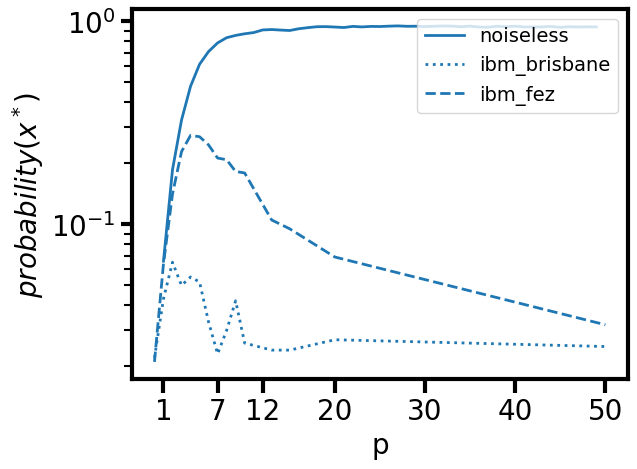

In [68]:
results = {"noiseless":np.load("./Data/8_results.npy", allow_pickle=True).item(),
           "ibm_fez":np.load("./Data/ibm_fez/8_FC_1Dopt.npy", allow_pickle=True).item(),
           "ibm_brisbane":np.load("./Data/ibm_brisbane/8_FC_1Dopt.npy", allow_pickle=True).item(),}


fig,ax = plt.subplots()
list_p = results["noiseless"]["landscape"]["optimal"]["list_p"]
probs = results["noiseless"]["landscape"]["optimal"]["probability"]
nq = results["noiseless"]["nq"]
ax.plot(list_p, probs, linewidth=2, label="noiseless")



ax.set_ylabel(r"$probability(x^*)$")
ax.set_xlabel("p")
ax.set_yticks([0.2 * i for i in range(1,6)]);
ax.set_xticks([1, 7, 12, 20, 30, 40, 50])
# ax2 = ax.twinx()
# ax2.plot(list_p, TTS,linewidth=2, color="tab:red")
# ax2.tick_params(axis='y', labelcolor='tab:red')
# ax2.set_ylabel(r"$TTS_{99\%}$ [a.u.]", color="tab:red")
linestyle = {"ibm_fez":"--", "ibm_brisbane":":"}
for backend in ["ibm_brisbane", "ibm_fez"]:
    list_p = results[backend]["ps"]
    best_prob = 0
    for i in range(results[backend]["sections"]):
        probs_i = [results[backend]["postprocessing"][results[backend]["Deltas"][0]][p][i]["probability"] for p in list_p]
        if np.mean(probs_i) > best_prob:
            best_prob = np.mean(probs_i)
            probs = probs_i
    ax.plot(list_p, probs, linewidth=2, label=backend, linestyle=linestyle[backend], color="tab:blue")
    # ax2.plot(list_p, [(pi * np.log(1-0.99)/np.log(1-probs[n]) if pi > 0 else np.log(1-0.99)/np.log(1-probs[n]) )for n, pi in enumerate(list_p) ], linestyle=linestyle[backend], color="tab:red", linewidth=2)
# ax2.set_yscale("log")
# ax2.set_yticks([25, 50, 100])
# ax2.set_yticklabels([25, 50,100])
ax.legend(loc=1)
ax.set_yscale("log")
fig.savefig(f"./Figures/probability_TTS_{nq}.pdf", bbox_inches="tight", transparent=True)

In [93]:
len(data["optimal"])

13

In [118]:
probs = [data["posprocessing"][p]["probability"] for p in data["ps"] if data["posprocessing"][p]["probability"] > 0]


max(probs)/(len(data["optimal"])/2**nq)

27.222646153846156

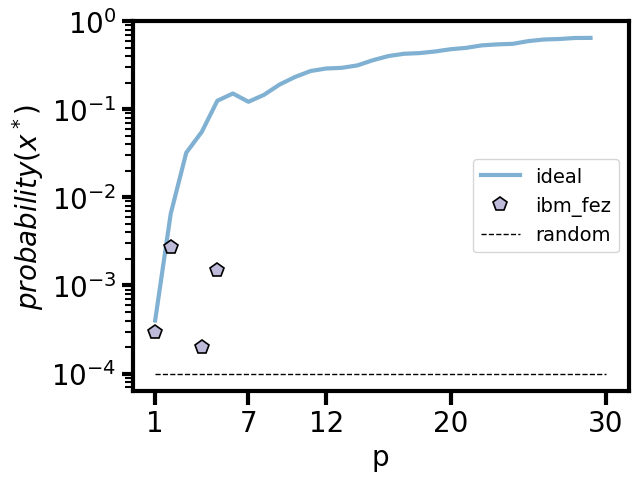

In [3]:
problem_name = ["17_farm","17_mammalia-kangaroo-interactions",][1]
nq = 17
results = np.load(f"./Data/{problem_name}_results.npy", allow_pickle=True).item()
backend_name = "ibm_fez"
method = "parity"
data = np.load(f"./Data/{backend_name}/{problem_name}_{method}.npy", allow_pickle=True).item()
colors = plt.get_cmap("Set3")
list_p = results["landscape"]["optimal"]["list_p"]
probs = results["landscape"]["optimal"]["probability"]
# nq = results["nq"]
fig,ax = plt.subplots()
ax.plot(list_p, probs, linewidth=3, label="ideal", color=colors(4))
probs = [data["posprocessing"][p]["probability"] for p in data["ps"] if data["posprocessing"][p]["probability"] > 0]
ps = [p for p in data["ps"] if data["posprocessing"][p]["probability"] > 0]

ax.plot(ps, probs, linewidth=0, markeredgecolor="black", markersize=10, label="ibm_fez", color=colors(2), marker="p")
ax.plot([1, 30], 2*[len(data["optimal"])/2**nq], linestyle="--", color="black", label="random")
ax.set_ylabel(r"$probability(x^*)$")
ax.set_xlabel("p")
ax.set_yticks([0.2 * i for i in range(1,6)]);
ax.set_xticks([1, 7, 12, 20, 30])
ax.set_yscale("log")
ax.legend()
fig.savefig(f"./Figures/{problem_name}_probability.pdf", bbox_inches="tight", transparent=True)

In [8]:
[round(10000 * data["posprocessing"][p]["probability"]) for p in data["ps"]]

[3, 27, 0, 2, 15]